In [2]:
import pandas as pd

# Load the sales data
file_path = 'SalesData.xlsx'
sales_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(sales_data.head())

# Print the column names and data types
print(sales_data.columns)
print(sales_data.dtypes)

# Get basic statistical details
print(sales_data.describe(include='all'))

# Check for missing values
print(sales_data.isnull().sum())


   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television     95      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater     50       500.0   
2 2018-02-09  Central  Hermann       Luis    Television     36      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone     27       225.0   
4 2018-03-15     West  Timothy    Stephen    Television     56      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  
Index(['OrderDate', 'Region', 'Manager', 'SalesMan', 'Item', 'Units',
       'Unit_price', 'Sale_amt'],
      dtype='object')
OrderDate     datetime64[ns]
Region                object
Manager               object
SalesMan              object
Item                  object
Units                  int64
Unit_price           float64
Sale_amt             float64
dtype: object
                  OrderDate   Region Manager   SalesMan          Item  \
co

C:\Users\SRIVATSAL NARAYAN\AppData\Local\Temp\ipykernel_21568\2328090225.py:15: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(sales_data.describe(include='all'))


In [3]:
least_sales_per_item = sales_data.groupby('Item')['Sale_amt'].min().reset_index()
print(least_sales_per_item)


           Item  Sale_amt
0    Cell Phone    3375.0
1          Desk     250.0
2  Home Theater    2000.0
3    Television    8386.0
4   Video Games     936.0


In [5]:
sales_data['Year'] = sales_data['OrderDate'].dt.year

total_sales_year_region = sales_data.groupby(['Year', 'Region'])['Sale_amt'].sum().reset_index()
print(total_sales_year_region)


   Year   Region  Sale_amt
0  2018  Central  479825.0
1  2018     East  293780.0
2  2018     West  105424.0
3  2019  Central  349944.5
4  2019     East   27227.0
5  2019     West   49475.0


In [13]:
from datetime import datetime

reference_date = datetime(2020, 1, 1)

sales_data['days_diff'] = (reference_date - sales_data['OrderDate']).dt.days

print(sales_data[['OrderDate', 'days_diff']].head())


   OrderDate  days_diff
0 2018-01-06        725
1 2018-01-23        708
2 2018-02-09        691
3 2018-02-26        674
4 2018-03-15        657


In [12]:
manager_salesmen_df = sales_data.groupby('Manager')['SalesMan'].unique().reset_index()

manager_salesmen_df = manager_salesmen_df.rename(columns={'SalesMan': 'list_of_salesmen'})

print(manager_salesmen_df)


   Manager            list_of_salesmen
0  Douglas      [Michael, Karen, John]
1  Hermann       [Shelli, Luis, Sigal]
2   Martha  [Alexander, Steven, Diana]
3  Timothy            [David, Stephen]


In [11]:
region_sales_info = sales_data.groupby('Region').agg(
    salesmen_count=('SalesMan', 'nunique'),
    total_sales=('Sale_amt', 'sum')
).reset_index()

print(region_sales_info)


    Region  salesmen_count  total_sales
0  Central               6     829769.5
1     East               3     321007.0
2     West               2     154899.0


In [10]:
manager_total_sales = sales_data.groupby('Manager')['Sale_amt'].sum().reset_index()

total_sales_all = manager_total_sales['Sale_amt'].sum()

manager_total_sales['percent_sales'] = (manager_total_sales['Sale_amt'] / total_sales_all) * 100

manager_sales_percent_df = manager_total_sales.rename(columns={'Sale_amt': 'total_sales'})

print(manager_sales_percent_df)


   Manager  total_sales  percent_sales
0  Douglas     239056.0      18.308990
1  Hermann     365108.5      27.963188
2   Martha     472493.0      36.187629
3  Timothy     229018.0      17.540193


PART 2

In [15]:
import pandas as pd

# Load the dataset, skipping bad lines
imdb_data = pd.read_csv('imdb.csv', error_bad_lines=False)

# Display the first few rows to confirm loading
print(imdb_data.head())


print(imdb_data.info())

print(imdb_data.describe())

for col in imdb_data.columns:
    print(f"Unique values in '{col}': {imdb_data[col].unique()[:10]}")  # Displaying first 10 unique values for brevity

print(imdb_data.isnull().sum())


C:\Users\SRIVATSAL NARAYAN\AppData\Local\Temp\ipykernel_21568\1552401589.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imdb_data = pd.read_csv('imdb.csv', error_bad_lines=False)
Skipping line 66: expected 44 fields, saw 46
Skipping line 111: expected 44 fields, saw 45
Skipping line 198: expected 44 fields, saw 45
Skipping line 222: expected 44 fields, saw 46
Skipping line 278: expected 44 fields, saw 45
Skipping line 396: expected 44 fields, saw 45
Skipping line 403: expected 44 fields, saw 45
Skipping line 421: expected 44 fields, saw 45
Skipping line 437: expected 44 fields, saw 45
Skipping line 462: expected 44 fields, saw 46
Skipping line 491: expected 44 fields, saw 45
Skipping line 515: expected 44 fields, saw 45
Skipping line 529: expected 44 fields, saw 45
Skipping line 530: expected 44 fields, saw 45
Skipping line 558: expected 44 fields, saw 45
Skipping line 623: expected 44 f

                   fn        tid                             title  \
0  titles01/tt0012349  tt0012349  Der Vagabund und das Kind (1921)   
1  titles01/tt0015864  tt0015864                 Goldrausch (1925)   
2  titles01/tt0017136  tt0017136                 Metropolis (1927)   
3  titles01/tt0017925  tt0017925                Der General (1926)   
4  titles01/tt0021749  tt0021749      Lichter der Großstadt (1931)   

                wordsInTitle                                   url  \
0  der vagabund und das kind  http://www.imdb.com/title/tt0012349/   
1                 goldrausch  http://www.imdb.com/title/tt0015864/   
2                 metropolis  http://www.imdb.com/title/tt0017136/   
3                der general  http://www.imdb.com/title/tt0017925/   
4      lichter der gro stadt  http://www.imdb.com/title/tt0021749/   

   imdbRating  ratingCount  duration    year         type  ...  News  \
0         8.4      40550.0    3240.0  1921.0  video.movie  ...     0   
1         8.3 

In [16]:
import csv

input_file = 'imdb.csv'
output_file = 'imdb_cleaned.csv'

def fix_csv(input_file, output_file):
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, \
         open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        header = next(reader)
        writer.writerow(header)
        
        for row in reader:
            if len(row) == len(header):
                writer.writerow(row)
            else:
                print(f"Skipping line due to incorrect number of fields: {row}")

fix_csv(input_file, output_file)

print("CSV file cleaned and saved as 'imdb_cleaned.csv'")


Skipping line due to incorrect number of fields: ['titles01/tt0057012', 'tt0057012', 'Dr. Seltsam\\', ' oder wie ich lernte\\', ' die Bombe zu lieben (1964)', 'dr seltsam oder wie ich lernte die bombe zu lieben', 'http://www.imdb.com/title/tt0057012/', '8.6', '263157', '5700', '1964', 'video.movie', '13', '4', '56', '432', '782', '2', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0']
Skipping line due to incorrect number of fields: ['titles01/tt0086250', 'tt0086250', 'Scarface - Toni\\', ' das Narbengesicht (1983)', 'scarface toni das narbengesicht', 'http://www.imdb.com/title/tt0086250/', '8.3', '379114', '10200', '1983', 'video.movie', '0', '3', '134', '985', '777', '2', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
Skipping line due to incorrect number of fields: ['titles01/tt0367110', 'tt0367110', 'Sw

In [18]:
# Print the column names of the DataFrame to identify the correct column name
print(imdb_data.columns)


Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')


In [21]:
fifth_movie_rating = imdb_data.iloc[4]['imdbRating']
print(f"IMDb rating for the fifth movie: {fifth_movie_rating}")


IMDb rating for the fifth movie: 8.7


In [22]:
imdb_data['duration_minutes'] = imdb_data['duration'] / 60

shortest_runtime_movie = imdb_data.loc[imdb_data['duration_minutes'].idxmin()]['title']

longest_runtime_movie = imdb_data.loc[imdb_data['duration_minutes'].idxmax()]['title']

print(f"Movie with the shortest runtime: {shortest_runtime_movie}")
print(f"Movie with the longest runtime: {longest_runtime_movie}")


Movie with the shortest runtime: Traffic Crossing Leeds Bridge (1888)
Movie with the longest runtime: Baseball The National Pastime (TV Episode 1994)


In [25]:

sorted_movies = imdb_data.sort_values(by=['year', 'imdbRating'], ascending=[True, False])

print(sorted_movies[['title', 'year', 'imdbRating']])


                                        title    year  imdbRating
13605            Roundhay Garden Scene (1888)  1888.0         7.8
13282    Traffic Crossing Leeds Bridge (1888)  1888.0         7.2
6705                  Blacksmith Scene (1893)  1893.0         6.3
12316  Dickson Experimental Sound Film (1894)  1894.0         6.8
6706            The Kiss in the Tunnel (1899)  1899.0         5.9
...                                       ...     ...         ...
8188                             Summer Hours     NaN         NaN
8618                            Icarus Factor     NaN         NaN
8652                   Thomas the Tank Engine     NaN         NaN
14065                                 Voltron     NaN         NaN
14138                  The Monkey Wrench Gang     NaN         NaN

[14332 rows x 3 columns]


In [28]:
filtered_movies = imdb_data[(imdb_data['duration_minutes'] >= 30) & (imdb_data['duration_minutes'] <= 180)]

print(filtered_movies[['title', 'duration_minutes']])


                                                   title  duration_minutes
0                       Der Vagabund und das Kind (1921)              54.0
1                                      Goldrausch (1925)              95.0
2                                      Metropolis (1927)             153.0
3                                     Der General (1926)             107.0
4                           Lichter der Großstadt (1931)              87.0
...                                                  ...               ...
14326  Parker Lewis - Der Coole von der Schule Parker...              30.0
14328  Playhouse 90 The Miracle Worker (TV Episode 1957)              90.0
14329  Private Screenings Robert Mitchum and Jane Rus...              60.0
14330    Providence All the King's Men (TV Episode 2002)              60.0
14331                          QI Adam (TV Episode 2003)              30.0

[11952 rows x 2 columns]


PART 3

In [29]:
import pandas as pd

diamonds_data = pd.read_csv('diamonds.csv')

print(diamonds_data.head())

print(diamonds_data.columns)

print(diamonds_data.dtypes)

print(diamonds_data.isnull().sum())

print(diamonds_data.describe())

print(diamonds_data.duplicated().sum())


  carat      cut color clarity  depth  table  price     x     y     z
0  0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1  0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2  0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3  0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4  0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
carat       object
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z           object
dtype: object
carat      1
cut        1
color      0
clarity    0
depth      0
table      0
price      4
x          0
y          0
z          3
dtype: int64
              depth         table         price             x             y
count  53943.000000  53943.000000  53939.0

In [34]:
duplicate_count = diamonds_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 149


In [33]:
diamonds_data['carat'] = pd.to_numeric(diamonds_data['carat'], errors='coerce')
diamonds_data['z'] = pd.to_numeric(diamonds_data['z'], errors='coerce')

diamonds_data_cleaned = diamonds_data.dropna(subset=['carat', 'cut'])
print(diamonds_data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53938 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53938 non-null  float64
 1   cut      53938 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53938 non-null  float64
 5   table    53938 non-null  float64
 6   price    53934 non-null  float64
 7   x        53938 non-null  float64
 8   y        53938 non-null  float64
 9   z        53933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB
None


In [35]:
numeric_df = diamonds_data.select_dtypes(include=['float64'])
print(numeric_df.head())


   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31   63.3   58.0  335.0  4.34  4.35  2.75


In [36]:

def compute_volume(row):
    if row['depth'] > 60:
        return row['x'] * row['y'] * row['z']
    else:
        return 8

diamonds_data['volume'] = diamonds_data.apply(compute_volume, axis=1)
print(diamonds_data[['depth', 'x', 'y', 'z', 'volume']].head())


   depth     x     y     z    volume
0   61.5  3.95  3.98  2.43  38.20203
1   59.8  3.89  3.84  2.31   8.00000
2   56.9  4.05  4.07  2.31   8.00000
3   62.4  4.20  4.23  2.63  46.72458
4   63.3  4.34  4.35  2.75  51.91725


In [37]:
mean_price = diamonds_data['price'].mean()
diamonds_data['price'].fillna(mean_price, inplace=True)
print(diamonds_data['price'].isnull().sum())


0


EXTRA

In [38]:
print(diamonds_data.describe(include='all'))


               carat    cut  color clarity         depth         table  \
count   53939.000000  53942  53943   53943  53943.000000  53943.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13067           NaN           NaN   
mean        0.797942    NaN    NaN     NaN     61.749441     57.457084   
std         0.474012    NaN    NaN     NaN      1.432625      2.234504   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z        volume  
count   53943.000000  53943.0000

In [39]:
correlation_matrix = diamonds_data.corr()
print(correlation_matrix)


           carat     depth     table     price         x         y         z  \
carat   1.000000  0.028162  0.181703  0.921558  0.975096  0.951724  0.953387   
depth   0.028162  1.000000 -0.295770 -0.010664 -0.025342 -0.029390  0.094912   
table   0.181703 -0.295770  1.000000  0.127150  0.195363  0.183779  0.150957   
price   0.921558 -0.010664  0.127150  1.000000  0.884385  0.865373  0.861200   
x       0.975096 -0.025342  0.195363  0.884385  1.000000  0.974703  0.970769   
y       0.951724 -0.029390  0.183779  0.865373  0.974703  1.000000  0.952002   
z       0.953387  0.094912  0.150957  0.861200  0.970769  0.952002  1.000000   
volume  0.806418  0.345663 -0.023812  0.749215  0.771138  0.755040  0.809946   

          volume  
carat   0.806418  
depth   0.345663  
table  -0.023812  
price   0.749215  
x       0.771138  
y       0.755040  
z       0.809946  
volume  1.000000  


C:\Users\SRIVATSAL NARAYAN\AppData\Local\Temp\ipykernel_21568\3672497112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds_data.corr()


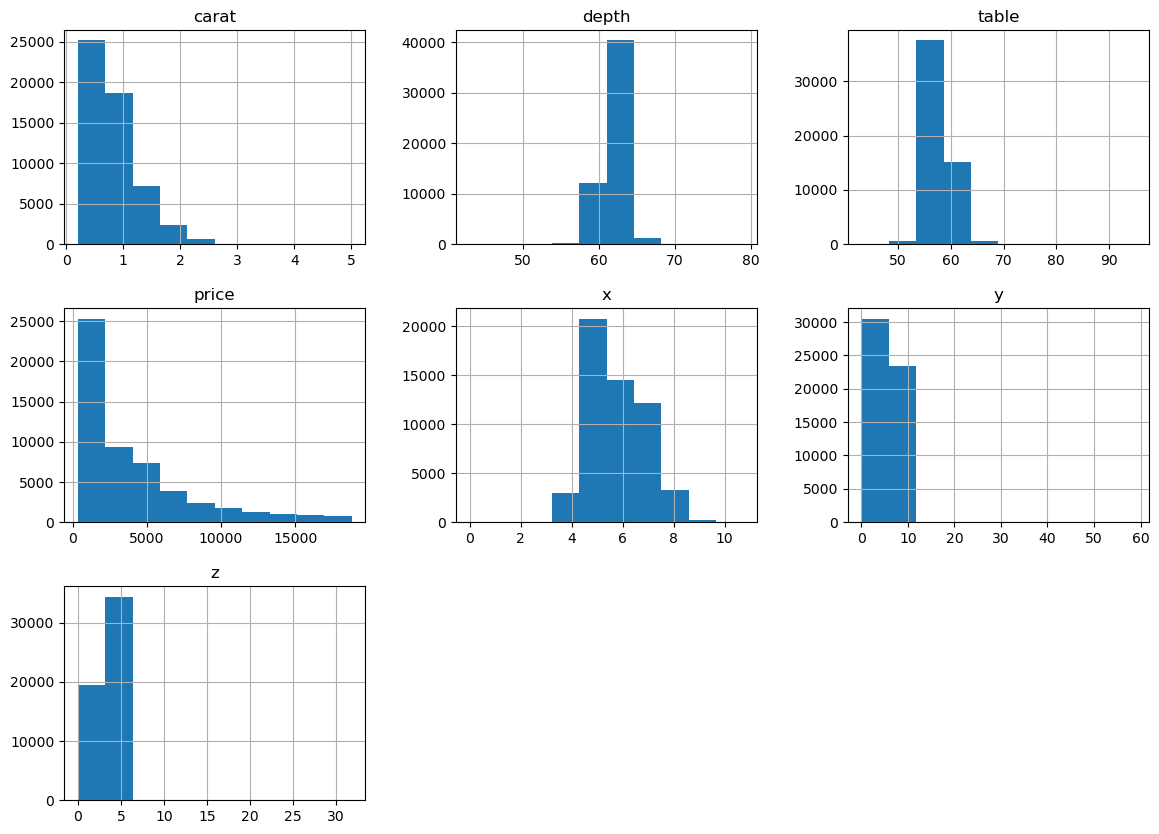

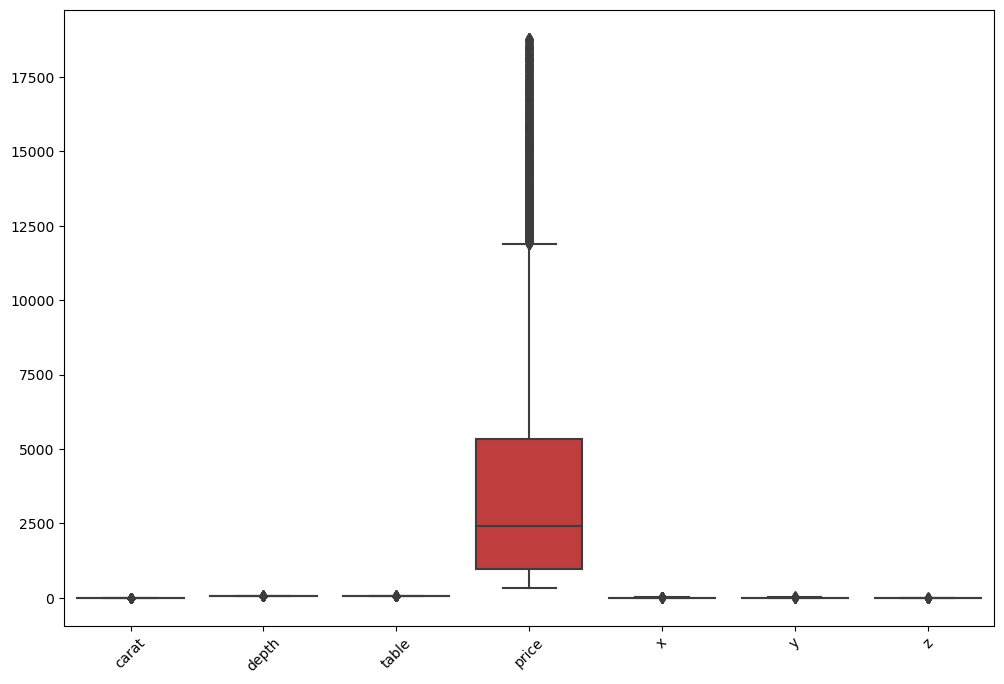

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
diamonds_data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].hist(figsize=(14, 10))
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=diamonds_data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.xticks(rotation=45)
plt.show()


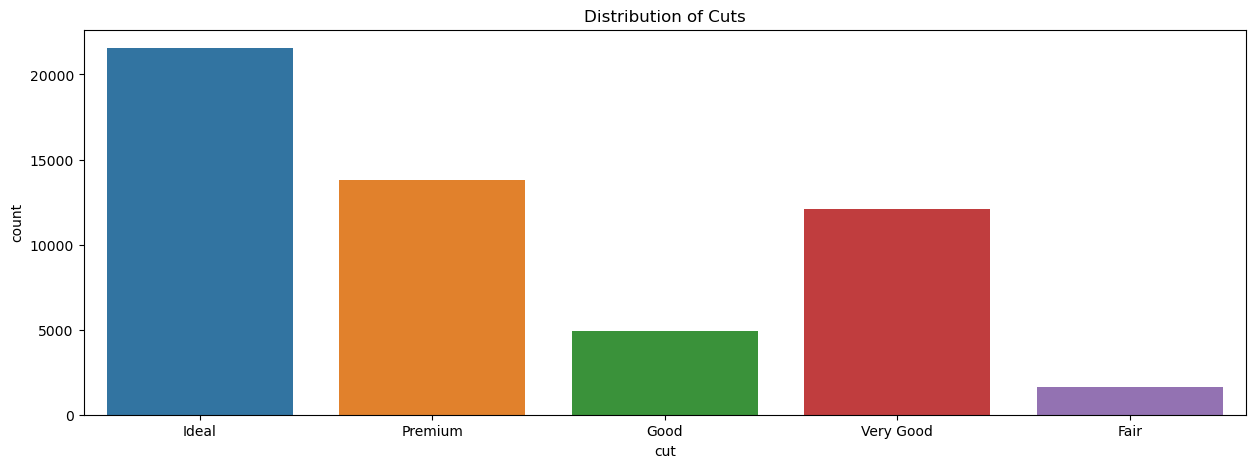

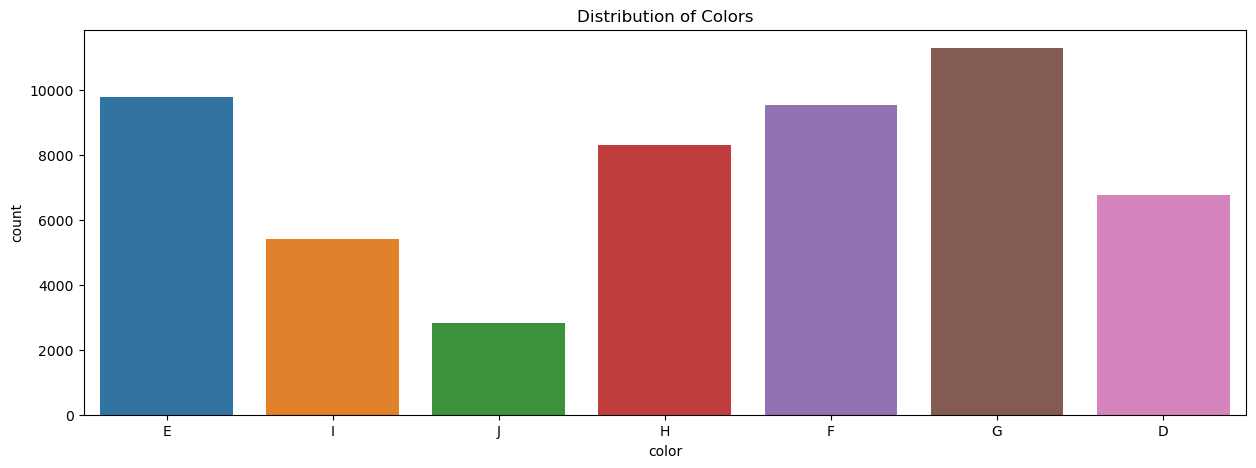

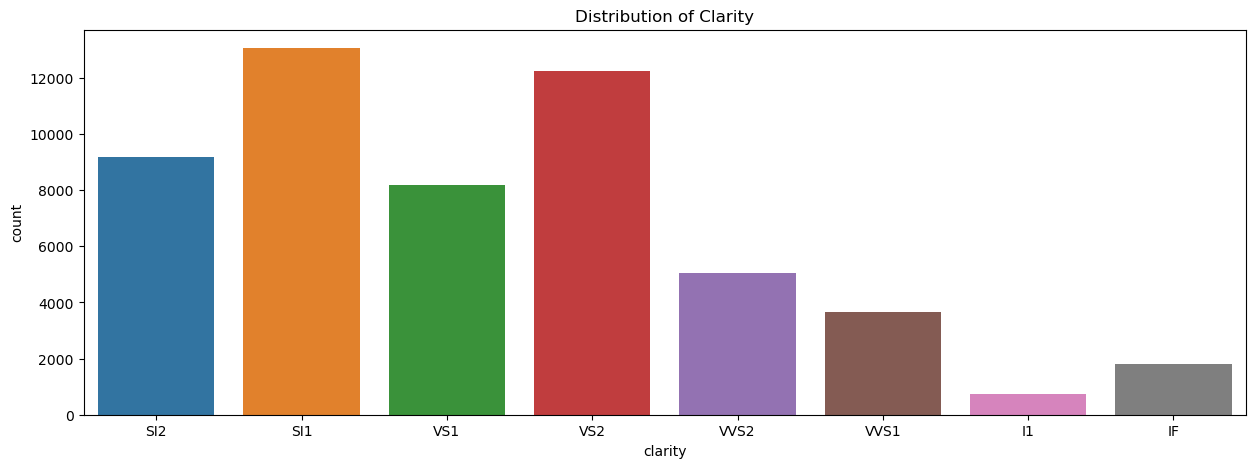

In [41]:
# Count plots
plt.figure(figsize=(15, 5))
sns.countplot(data=diamonds_data, x='cut')
plt.title('Distribution of Cuts')
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=diamonds_data, x='color')
plt.title('Distribution of Colors')
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=diamonds_data, x='clarity')
plt.title('Distribution of Clarity')
plt.show()


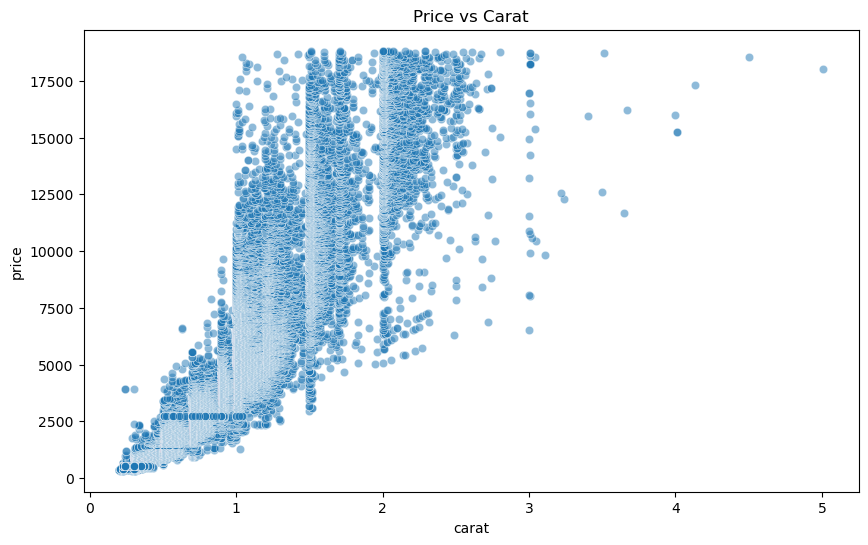

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds_data, x='carat', y='price', alpha=0.5)
plt.title('Price vs Carat')
plt.show()


In [43]:
# Average price by cut
avg_price_cut = diamonds_data.groupby('cut')['price'].mean()
print(avg_price_cut)

# Average price by color
avg_price_color = diamonds_data.groupby('color')['price'].mean()
print(avg_price_color)

# Average price by clarity
avg_price_clarity = diamonds_data.groupby('clarity')['price'].mean()
print(avg_price_clarity)


cut
Fair         4358.757764
Good         3928.121052
Ideal        3457.541970
Premium      4584.455243
Very Good    3982.337255
Name: price, dtype: float64
color
D    3169.954096
E    3077.064693
F    3724.886397
G    3999.239538
H    4487.076091
I    5091.874954
J    5321.552975
Name: price, dtype: float64
clarity
I1      3924.168691
IF      2864.839106
SI1     3995.885885
SI2     5062.514410
VS1     3839.455391
VS2     3925.085076
VVS1    2524.039359
VVS2    3284.447070
Name: price, dtype: float64


c:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


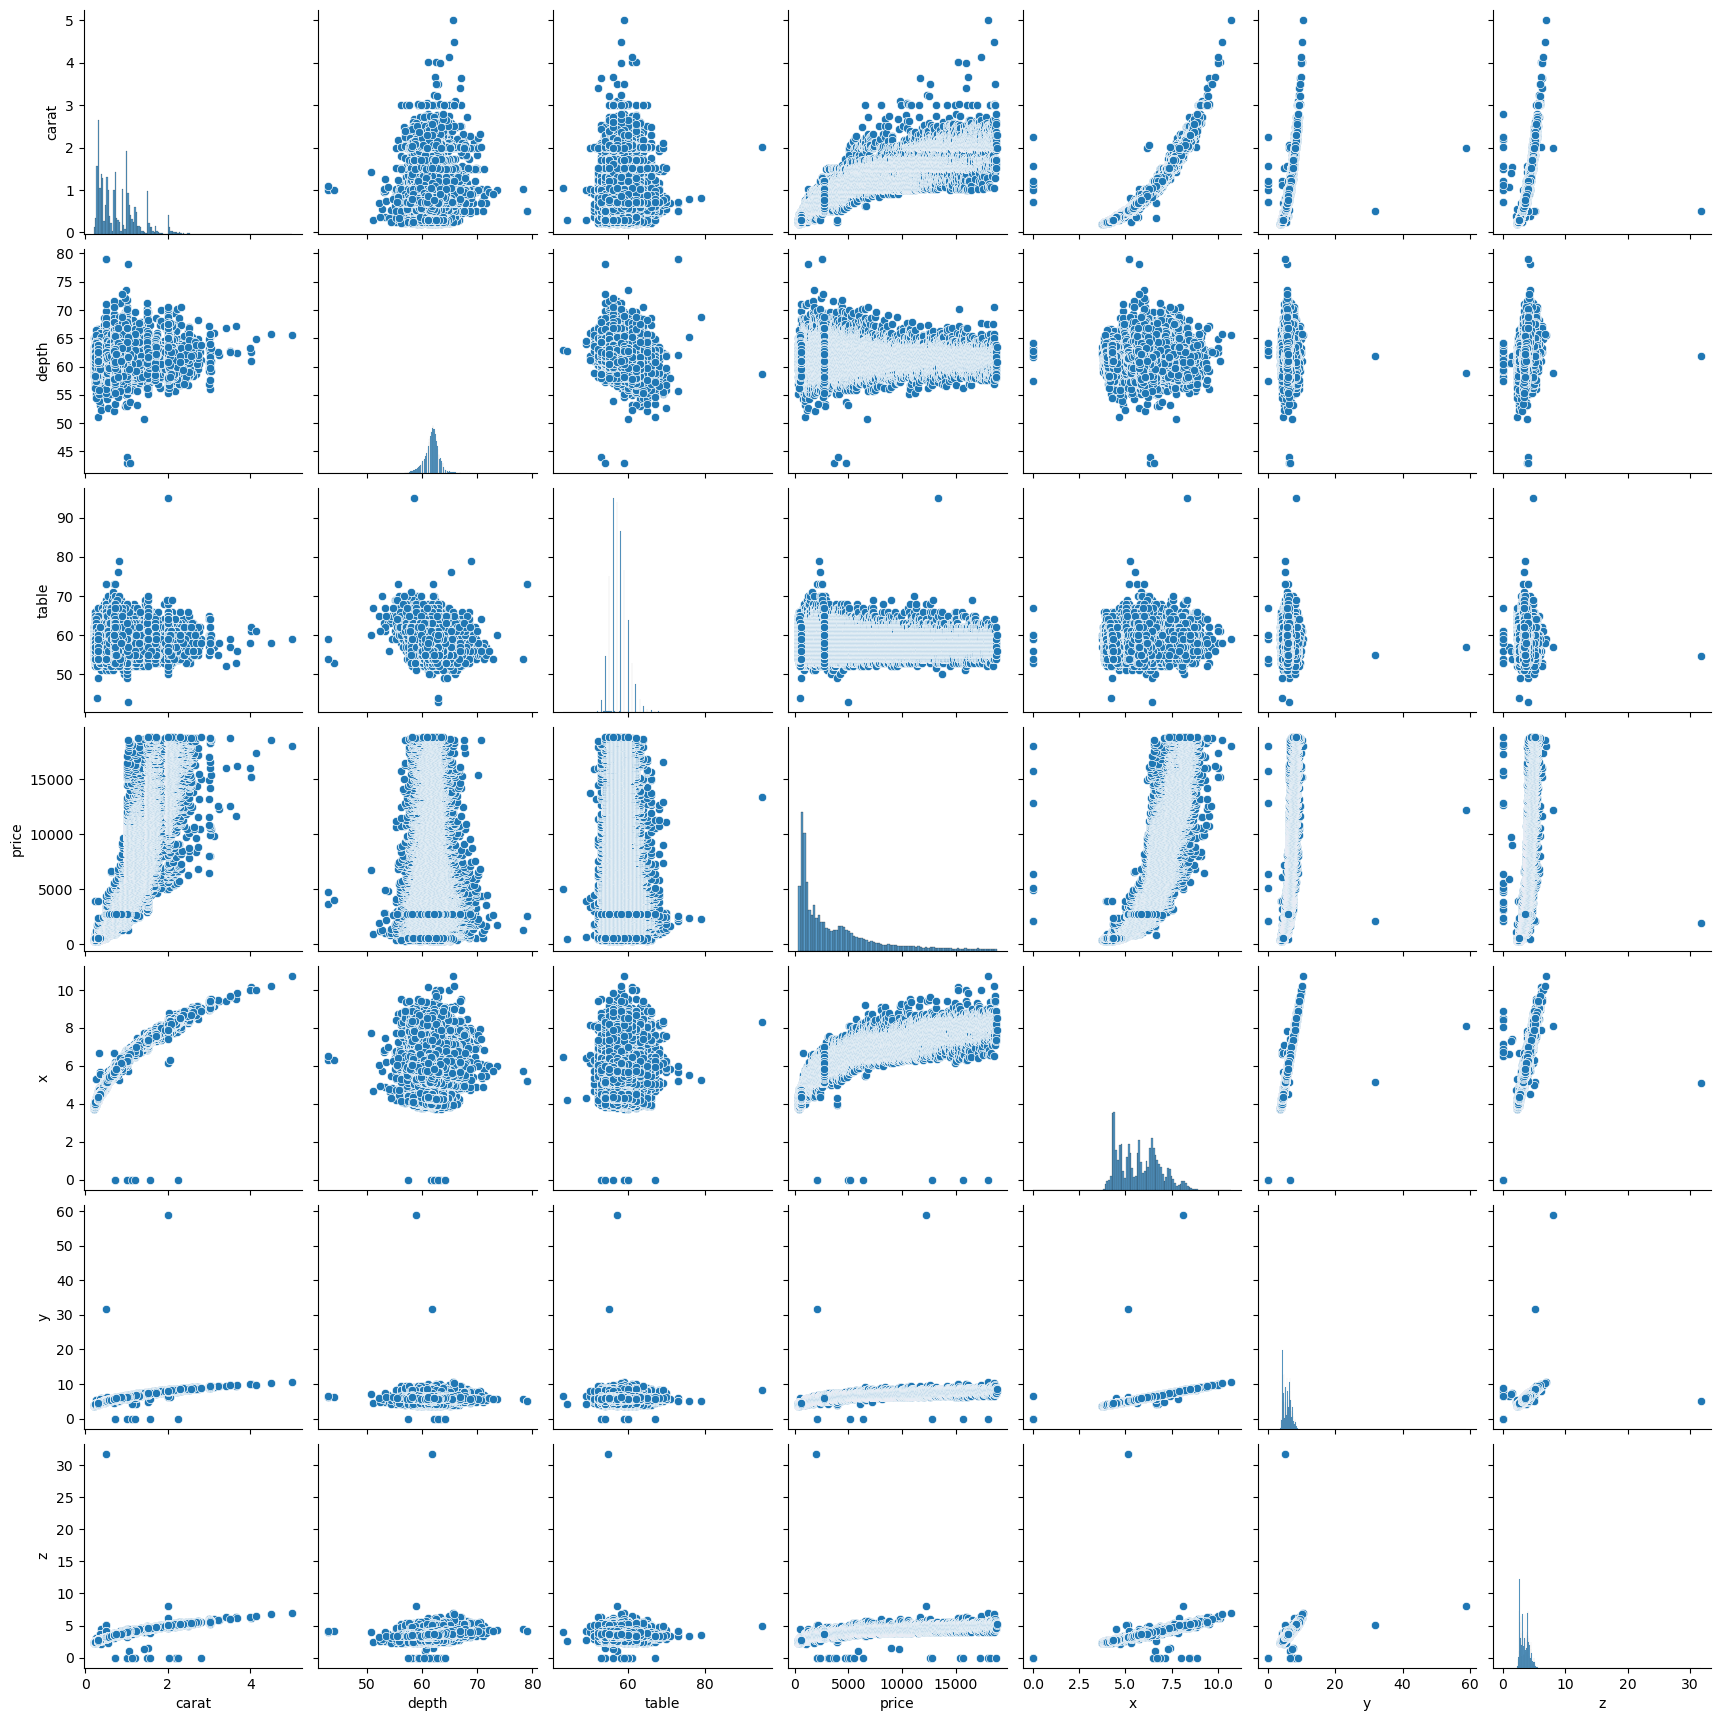

In [44]:
sns.pairplot(diamonds_data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.show()
